In [1]:
import pandas as pd
import numpy as np
import acessos as ac

In [3]:
query = """

	select 
	cpf,
    dt_resposta,
	ds_lealdade_nps
	from 
	customer_curated_zone.ca_book_cliente c
	inner join cx_curated_zone.indecx_nps n on (n.cd_cpf = c.cpf)
	group by 1,2,3


"""

df = ac.df_athena('flavia-costa', query)

In [4]:
len(df)

59997

In [11]:
df.head()

,cpf,dt_resposta,ds_lealdade_nps
0,15149752894,2023-04-11 09:08:31,promotor
1,77560566200,2023-04-01 08:01:21,promotor
2,03152797028,2023-01-25 14:41:48,promotor
3,06765489460,2023-01-21 06:37:31,promotor
4,00923328467,2023-03-25 21:16:54,promotor


In [6]:
query_erro = """

select 
	cpf, event_date, 1 as erro
	from 
	customer_curated_zone.ca_book_cliente c
	inner join processed_zone_events.backend b on (c.id_customer = b.data['customerId'])
	where lower(event_type) like '%%token%%'
    and substring(event_date, 1, 4) in ('2023')
    order by rand() 
	limit 50000

"""

df_2 = ac.df_athena('flavia-costa', query_erro)

In [13]:
df_2.head()

,cpf,event_date,erro
0,15308476489,2023-06-02,1
1,01597618241,2023-07-08,1
2,71396306234,2023-06-14,1
3,13636925695,2023-06-15,1
4,99177293215,2023-04-05,1


In [10]:
df['cpf'] = df['cpf'].str.zfill(11)

In [12]:
df_2['cpf'] = df_2['cpf'].str.zfill(11)

In [15]:
df_join = df.set_index('cpf').join(df_2.set_index('cpf'), how = "left", on = "cpf")

In [16]:
df_join['event_date'] = pd.to_datetime(df_join['event_date']) 
df_join['dt_resposta'] = pd.to_datetime(df_join['dt_resposta']) 

In [19]:
import seaborn as sns

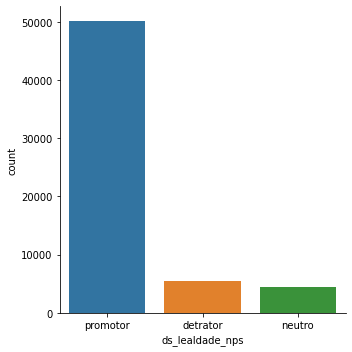

In [20]:
sns.catplot(data = df_join, x = 'ds_lealdade_nps', kind= 'count')

In [24]:
df_join['ds_lealdade_nps'].value_counts(normalize = True)

promotor    0.835503
detrator    0.090173
neutro      0.074325
Name: ds_lealdade_nps, dtype: float64

In [21]:
df_filter = df_join.query('erro == 1').query('dt_resposta > event_date')

In [22]:
len(df_filter)

103

In [27]:
df_filter['ds_lealdade_nps'].value_counts(normalize = True)

promotor    0.786408
detrator    0.165049
neutro      0.048544
Name: ds_lealdade_nps, dtype: float64

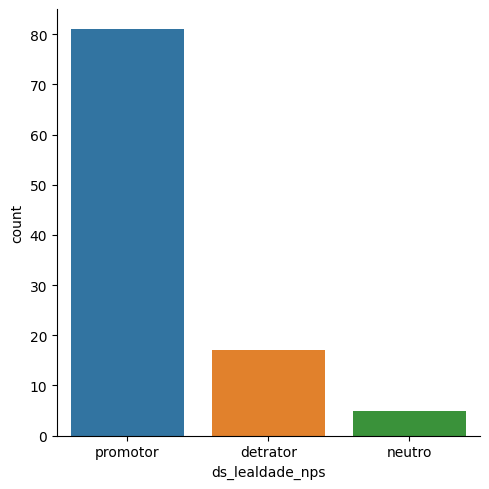

In [23]:
sns.catplot(data = df_filter, x = 'ds_lealdade_nps', kind= 'count')